Student name: Lin Yuan Chong

Student id: 22249516

# Task: Deep neural networks

#### Imports

In [3]:
import numpy as np
import matplotlib.pyplot as plt

## Get the data an manipulate

We're going to use the Fashion MNIST dataset, which we can download from OpenML.

Fashion-MNIST is a dataset of Zalando's article images—consisting of a set of 60,000 samples. Each sample is a 28x28 grayscale image, associated with a label from 10 classes.

Label IDs:
* T-shirt/top - 0
* Trouser - 1
* Pullover - 2
* Dress - 3
* Coat - 4
* Sandal - 5
* Shirt - 6
* Sneaker - 7
* Bag - 8
* Ankle boot - 9

We'll load up the Fashion-MNIST dataset. It will take a few seconds.


In [4]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import check_random_state

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("Fashion-MNIST", version=1, return_X_y=True, as_frame=False)

text_labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Let's also visualise a few random samples of this

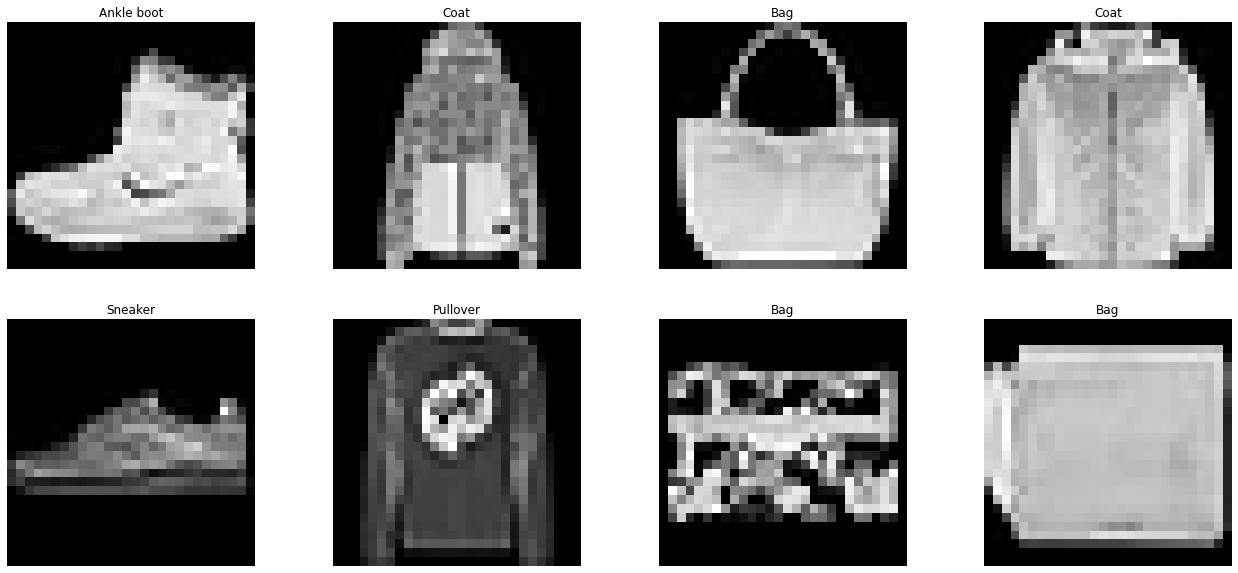

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = (0, 22, 100, 555, 666, 123, 10000, 55005)

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Visualize the image

fig, ax = plt.subplots(2, 4, figsize=(22, 10))
fig.subplots_adjust(wspace=0.3)
ax = ax.flatten()

for i in range(len(index)):
    ax[i].imshow(np.reshape(X[index[i]], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    ax[i].axis('off')  # clear x-axis and y-axis
    ax[i].set_title(text_labels[int(y[index[i]])])

plt.show()

### Data manipulation

Firstly, do a train/test split. Keep 20% of the data for test. Fix the `random_state` so that the test is completely repeatible.

Then use the `StandardScaler` function from `sklearn.preprocessing`, as the multi-layer perceptron can be quite sensitive to data scaling.

<span style="color:red">Insert your code below</span>.

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split data into training and testing datasets(80% $ 20%).
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Declare standard scaler for standardisation.
stdScaler = StandardScaler()
# Fit and transform X_train.
stdScaler.fit_transform(X_train)
# Fit and transform X_test.
stdScaler.transform(X_test)

array([[-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068],
       ...,
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068],
       [-0.00796844, -0.02016575, -0.02805079, ..., -0.15864275, -0.09123214, -0.03342068]])

## Task 1: Train a Perceptron

1. A single artifical neuron is a Perceptron, so use `sklearn`'s implementation of the Percpetron, and train it.
2. Calculate and print the accuracy
3. Discuss the result, does it seem good or bad?
4. Find an example where the classification is incorrect, and plot it. Discuss (e.g. does it kind of look like the digit that was predicted?)
5. Multiclass perceptron? We learned that the Percpetron is a binary classifier. Give a brief description of how multi-class perceptron might work. Of course, use the internet, but give it to me in your own words, and use a diagram as appropriate.

<span style="color:red">Insert your code below</span>.

### Question 1:

In [7]:
from sklearn.linear_model import Perceptron as Perceptron
from sklearn.metrics import accuracy_score

# Declare perceptron.
pcptn = Perceptron()

# Fit training data into the perceptron.
pcptn.fit(X_train, y_train)
# Predict.
pred = pcptn.predict(X_test)

### Question 2:

In [8]:
# Calculate an dprint accuracy.
acc = round(accuracy_score(y_test, pred) * 100, 2)
print('Accuracy: ', acc, '%')

Accuracy:  81.26 %


### Question 3:

The accuracy is not too bad for a simple linear classifier. However, as with all of these types of problems, most of the effort will go into gaining small, but important improvements. Let's see if we can make it better.

### Question 4:

Incorrect prediction discovered: Classification 5
Actual value:			 Pullover
Predicted value:		 Shirt


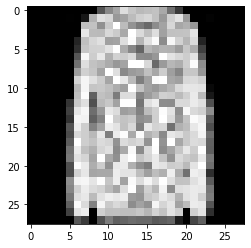

In [9]:
# Loop through the testing labels.
for i in range(len(y_test)):
  
  # If predicted label and actual label is different.
  if y_test[i] != pred[i]:

    # Print.
    print("Incorrect prediction discovered: Classification", i)
    # Print actual and prediction.
    print('Actual value:\t\t\t', text_labels[int(y_test[i])])
    print('Predicted value:\t\t', text_labels[int(pred[i])])

    # Visualisation.
    plt.imshow(np.reshape(X_test[i], (-1, 28)), cmap='gray', vmin=0, vmax=255)
    plt.show()

    # Break loop.
    break

### Question 5:

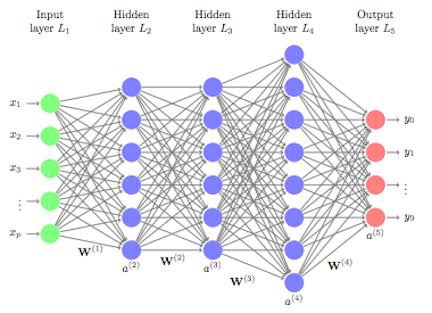

A multi class perceptron is known as a supervised learning algorithm for data classification with the nature of perceptron but able to predict multiple classes. The figure above shows the algorithm takes in multiple inputs and able to predict a series of classifications.

## Task 2: Train a multi-layer Perceptron with one hidden layer (of width 20)

Let's try going wide first

* Set the regularizing parameter to 0.1 (alpha = 0.1). We have looked at regularisation before in the context of machine learning algorithms. It is important, but we won't investigate it further here. We'll leave this fixed.
* Set verbose = 1, so we can look at what is happenign on each epoch (iteration)
* Set random_state=1 (or some constant), so the test is repeatible
* For the moment, set hidden_layer_sizes to (20,). 

This tuple then sets the number of hidden layers. The number of values in the tuple is the number of layers, and the number of each value is the number of nodes in that layer. So a tuple of (50,30,10) would be one layer with 50 nodes, connect to a second hidden layer with 30 nodes and a final hidden layer with 10 nodes). But for the moment, just go for one hidden layer with 20 nodes.

Also print the __training and accuracy score__ of our current network (remember the `accuracy_score` function from `sklearn.metrics`?). The score on the test dataset should not be too bad at this point. That's quite impressive for a first stab at a neural network. Let's see if we can do better, though!

<span style="color:red">Insert your code below</span>.

In [10]:
from sklearn.neural_network import MLPClassifier

# Declare MLPClassifier.
mlpClf = MLPClassifier(alpha=0.1, verbose=1, random_state=1, hidden_layer_sizes=(20,))

# Fit X train and y train data.
mlpClf.fit(X_train, y_train)
# Predict.
mlpPred = mlpClf.predict(X_test)

Iteration 1, loss = 2.84907956
Iteration 2, loss = 1.82171217
Iteration 3, loss = 1.58324633
Iteration 4, loss = 1.39878616
Iteration 5, loss = 1.29904194
Iteration 6, loss = 1.19063278
Iteration 7, loss = 1.10514174
Iteration 8, loss = 1.04693770
Iteration 9, loss = 0.99129127
Iteration 10, loss = 0.95327684
Iteration 11, loss = 0.90770029
Iteration 12, loss = 0.88269525
Iteration 13, loss = 0.87180219
Iteration 14, loss = 0.85521662
Iteration 15, loss = 0.83312833
Iteration 16, loss = 0.82169050
Iteration 17, loss = 0.81365001
Iteration 18, loss = 0.79797923
Iteration 19, loss = 0.79149544
Iteration 20, loss = 0.75880895
Iteration 21, loss = 0.70938243
Iteration 22, loss = 0.69642461
Iteration 23, loss = 0.68706839
Iteration 24, loss = 0.68203590
Iteration 25, loss = 0.67449970
Iteration 26, loss = 0.66456955
Iteration 27, loss = 0.66710880
Iteration 28, loss = 0.66178797
Iteration 29, loss = 0.65753992
Iteration 30, loss = 0.66089909
Iteration 31, loss = 0.65228522
Iteration 32, los

In [11]:
from sklearn.metrics import accuracy_score

# Accuracy.
mlpAcc = round(accuracy_score(y_test, mlpPred) * 100, 2)
print('Accuracy: ', mlpAcc, '%')

Accuracy:  82.17 %


#### Questions: (answer here)

1. What is the size of the input layer here? Explain
2. What is the size of the output layer here? Explain
3. How many weights in total does the algorithm learn?
4. What does it mean that the training accuracy and the test accuracy are different?

In [12]:
# Calculations for answers.
print("QUESTION 1:")
print(X[1].shape)
print(np.sqrt(X[1].shape))
print("\nQUESTION 3:")
print((784*20) + (20*10))

QUESTION 1:
(784,)
[28.]

QUESTION 3:
15880


###Question 1:

Size of the input layer is equal to the number of pixels of the input image, which is 784(28x28). Calculations are displayed above.

###Question 2:

Size of the output layer is the total number of label types available, which is 10 ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot').

###Question 3:

The number of weights are the total number of connections from inputs(784) to nodes(20) added with the total number of connections from nodes(20) to outputs(10). The answer is 15880, calculations are displayed above.

###Question 4:

Traning accuracy is calculated based on the predictions predicted using the training dataset compared to the actual training dataset's labels. While testing accuracy is calcualted based on the predictions predicted using the testing dataset compared to the actual testing dataset's labels.

The training accuracy will typically be higher than the testing accuracy, as the model is trained using the training dataset. The testing dataset is only trained using the predefined training model constructed via the training dataset.

#### Wider, wider, wider

Let's go wider. We have quite a lot of input features, and somehow it might seem that if we immediately connect this to a layer with only 20 neurons that something might be lost?

Let's see if more features help!

Iterate over a wider number of neurons, and plot the train accuracy and test accuracy as a graph. For example, iterate over a set of widths of `(20, 50, 100, 200)`, or something similar.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

In [28]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

a_test = []
a_train = []

widths = (20, 50, 100, 200)

for width in widths:

  # Declare MLPClassifier.
  mlpClf1 = MLPClassifier(alpha=0.001, verbose=1, random_state=42, hidden_layer_sizes=(width,))

  # Fit training data.
  mlpClf1.fit(X_train, y_train)

  # Predict training.
  mlp1TrainPred = mlpClf1.predict(X_train)
  # Predict testing.
  mlp1TestPred = mlpClf1.predict(X_test)
  
  a_train.append(accuracy_score(y_train, mlp1TrainPred))
  a_test.append(accuracy_score(y_test, mlp1TestPred))

  print('a_train:\t', a_train)
  print('a_test:\t', a_test)

Iteration 1, loss = 2.69674965
Iteration 2, loss = 1.60080512
Iteration 3, loss = 1.37596596
Iteration 4, loss = 1.26779559
Iteration 5, loss = 1.17373339
Iteration 6, loss = 1.10427602
Iteration 7, loss = 1.04978684
Iteration 8, loss = 0.99542072
Iteration 9, loss = 0.95383561
Iteration 10, loss = 0.90536267
Iteration 11, loss = 0.86668434
Iteration 12, loss = 0.84544113
Iteration 13, loss = 0.81349564
Iteration 14, loss = 0.77716204
Iteration 15, loss = 0.74584343
Iteration 16, loss = 0.73411198
Iteration 17, loss = 0.71177024
Iteration 18, loss = 0.70442904
Iteration 19, loss = 0.69517733
Iteration 20, loss = 0.68979885
Iteration 21, loss = 0.68702040
Iteration 22, loss = 0.68726086
Iteration 23, loss = 0.67182079
Iteration 24, loss = 0.67789428
Iteration 25, loss = 0.67042437
Iteration 26, loss = 0.66190078
Iteration 27, loss = 0.66023952
Iteration 28, loss = 0.65516662
Iteration 29, loss = 0.65569381
Iteration 30, loss = 0.64980492
Iteration 31, loss = 0.64936564
Iteration 32, los

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Accuracies.
mlp1TrainAcc = round(accuracy_score(y_train, mlp1TrainPred) * 100, 2)
mlp1TestAcc = round(accuracy_score(y_test, mlp1TestPred) * 100, 2)

print('Training accuracy:\t', mlp1TrainAcc, '%')
print('Testing accuracy:\t', mlp1TestAcc, '%')

Training accuracy:	 90.91 %
Testing accuracy:	 86.92 %


Text(0, 0.5, 'Accuracy')

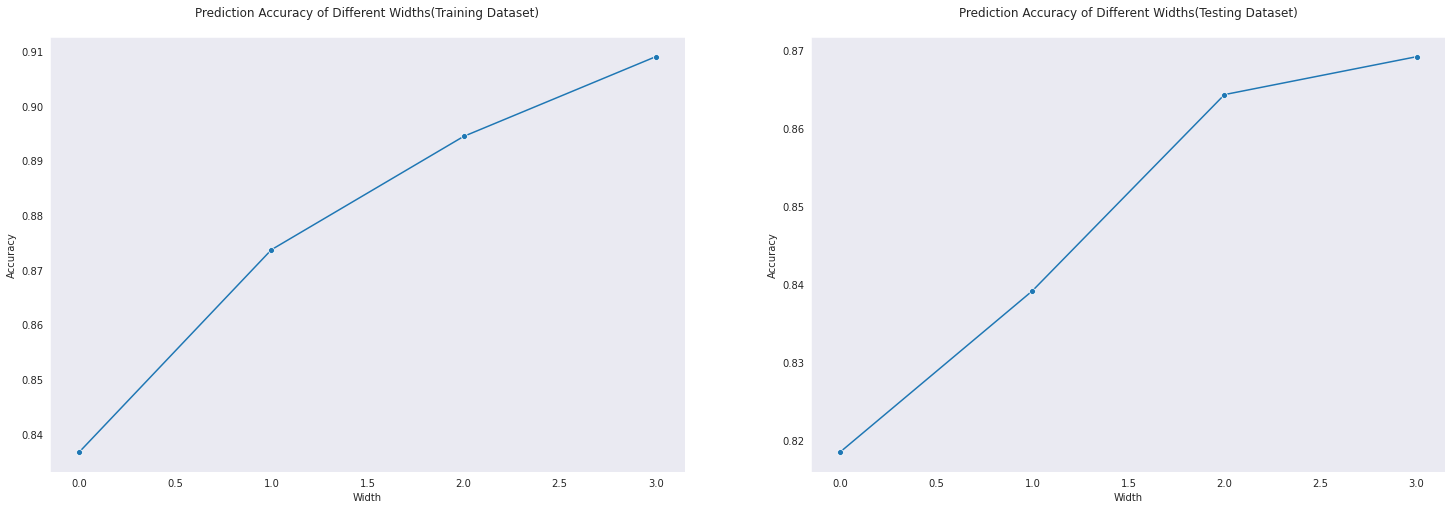

In [48]:
# Visualisation.
fig = plt.figure(figsize=(25, 8))
gs = fig.add_gridspec(1, 2)

# Training dataset figure.
ax = fig.add_subplot(gs[0, 0])
sns.lineplot(data=a_train, marker="o")
ax.set_title('Prediction Accuracy of Different Widths(Training Dataset)', pad = 20)
ax.set_xlabel('Width')
ax.set_ylabel('Accuracy')

# Testing dataset figure.
ax = fig.add_subplot(gs[0, 1])
sns.lineplot(data=a_test, marker="o")
ax.set_title('Prediction Accuracy of Different Widths(Testing Dataset)', pad = 20)
ax.set_xlabel('Width')
ax.set_ylabel('Accuracy')

Questions:

1. When you trained for all the different widths, did you notice anything about how long each training took? Discuss this.

2. What can you infer from the graph?

For the second question, think about the following:
* For the number of neurons you have tested, what is the best? (Highest performance -vs- lowest number of neurons)
* How many weights are learned by the algorithm for our optimal solution?
* Is there any evidence of overfitting occuring? Discuss this. What could we do to reduce this, if it is evident? (No need to implement anything to address tyhe overfitting, just comment)
(Hint: a large divergence between training accuracy and testing accuracy can indicate over-fitting).

### Question 1

The wider the width the more hidden layers exist in the algorithm, thus, more weights are taken into consideration, resulting in aking more time to complete each run. 

### Question 2

From the graph, we can tell that accuracy increases as the width increases, thus, the wider the width the better. We can also tell that the overall training accuracy is better than the overall testing accuracy as expected before.

The optimal solution takes in width size of 200. The number of weights can be calculated by (784x200) + (200x10) = 804210.

We dont see large convergence of training and testing accuracy, thus overfitting did not occur.

## Task 3: The deeper the better!

Previously, we only had a single hidden layer, and we went as wide as a couple of hundred neurons. That is a lot of neurons and a lot of computation. Can we do better with fewer neurons by going deeper and using more layers? Now we're going to start playing with different configurations.

Rerun the above loop, but let's use a set of deeper networks. These are going to be simply designed. I suggest to use something like:
`layers = ((20,20),(20,20,20),(50,20),(100,100,50))`

Plot the train and test accuracy as a graph.

Same as before, set `alpha=0.001` and set `random_state` to some constant (e.g. `random_state=42`)

**Note**: you might be feeling at this point that picking the neural network architecture is kind of random. At the moment, it is, to be honest. How many neurons per layer should I use? How many layers? And then I have to pick the training parameters on top of this?? These are all called hyperparameters of the network, and there is a lot of skill to develop to develop to be able to design networks efficiently and pick the right training parameters.

<font color='red'>Enter your code here</font>

In [53]:
layers = ((20,20),(20,20,20),(50,20),(100,100,50))

a_test = []
a_train = []


for layer in layers:

  # Declare MLPClassifier.
  mlpClf2 = MLPClassifier(alpha=0.001, verbose=1, random_state=42, hidden_layer_sizes=layer)

  # Fit training data.
  mlpClf2.fit(X_train, y_train)

  # Predict training.
  mlp2TrainPred = mlpClf2.predict(X_train)
  # Predict testing.
  mlp2TestPred = mlpClf2.predict(X_test)
  
  a_train.append(accuracy_score(y_train, mlp2TrainPred))
  a_test.append(accuracy_score(y_test, mlp2TestPred))

  print('a_train:\t', a_train)
  print('a_test:\t', a_test)

Iteration 1, loss = 2.93229103
Iteration 2, loss = 1.50899351
Iteration 3, loss = 1.35213912
Iteration 4, loss = 1.17028538
Iteration 5, loss = 1.02677643
Iteration 6, loss = 0.95814838
Iteration 7, loss = 0.91454450
Iteration 8, loss = 0.87720190
Iteration 9, loss = 0.85095509
Iteration 10, loss = 0.83849979
Iteration 11, loss = 0.82223605
Iteration 12, loss = 0.80506656
Iteration 13, loss = 0.79459996
Iteration 14, loss = 0.78674837
Iteration 15, loss = 0.77932036
Iteration 16, loss = 0.76550713
Iteration 17, loss = 0.77539821
Iteration 18, loss = 0.76402649
Iteration 19, loss = 0.74477310
Iteration 20, loss = 0.71748385
Iteration 21, loss = 0.70181483
Iteration 22, loss = 0.69135464
Iteration 23, loss = 0.69910442
Iteration 24, loss = 0.67908120
Iteration 25, loss = 0.67979830
Iteration 26, loss = 0.67227083
Iteration 27, loss = 0.67348076
Iteration 28, loss = 0.66753179
Iteration 29, loss = 0.67940083
Iteration 30, loss = 0.66137315
Iteration 31, loss = 0.66496374
Iteration 32, los

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


a_train:	 [0.8131607142857142, 0.8682857142857143]
a_test:	 [0.7896428571428571, 0.8470714285714286]
Iteration 1, loss = 3.31628563
Iteration 2, loss = 1.49935641
Iteration 3, loss = 1.26889492
Iteration 4, loss = 1.15423907
Iteration 5, loss = 1.09642772
Iteration 6, loss = 1.05465164
Iteration 7, loss = 1.01836022
Iteration 8, loss = 0.99627624
Iteration 9, loss = 0.96164657
Iteration 10, loss = 0.82426116
Iteration 11, loss = 0.76704320
Iteration 12, loss = 0.74143301
Iteration 13, loss = 0.71484484
Iteration 14, loss = 0.68612851
Iteration 15, loss = 0.64275013
Iteration 16, loss = 0.60274312
Iteration 17, loss = 0.57400255
Iteration 18, loss = 0.54228467
Iteration 19, loss = 0.51564353
Iteration 20, loss = 0.49084674
Iteration 21, loss = 0.47099576
Iteration 22, loss = 0.44952494
Iteration 23, loss = 0.42831423
Iteration 24, loss = 0.41722231
Iteration 25, loss = 0.40904122
Iteration 26, loss = 0.39898215
Iteration 27, loss = 0.38351159
Iteration 28, loss = 0.37626261
Iteration 29

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


a_train:	 [0.8131607142857142, 0.8682857142857143, 0.9380357142857143, 0.9653035714285715]
a_test:	 [0.7896428571428571, 0.8470714285714286, 0.8745714285714286, 0.8799285714285714]


In [55]:
# Accuracies.
mlp2TrainAcc = round(accuracy_score(y_train, mlp2TrainPred) * 100, 2)
mlp2TestAcc = round(accuracy_score(y_test, mlp2TestPred) * 100, 2)

print('Training accuracy:\t', mlp2TrainAcc, '%')
print('Testing accuracy:\t', mlp2TestAcc, '%')

Training accuracy:	 96.53 %
Testing accuracy:	 87.99 %


Text(0, 0.5, 'Accuracy')

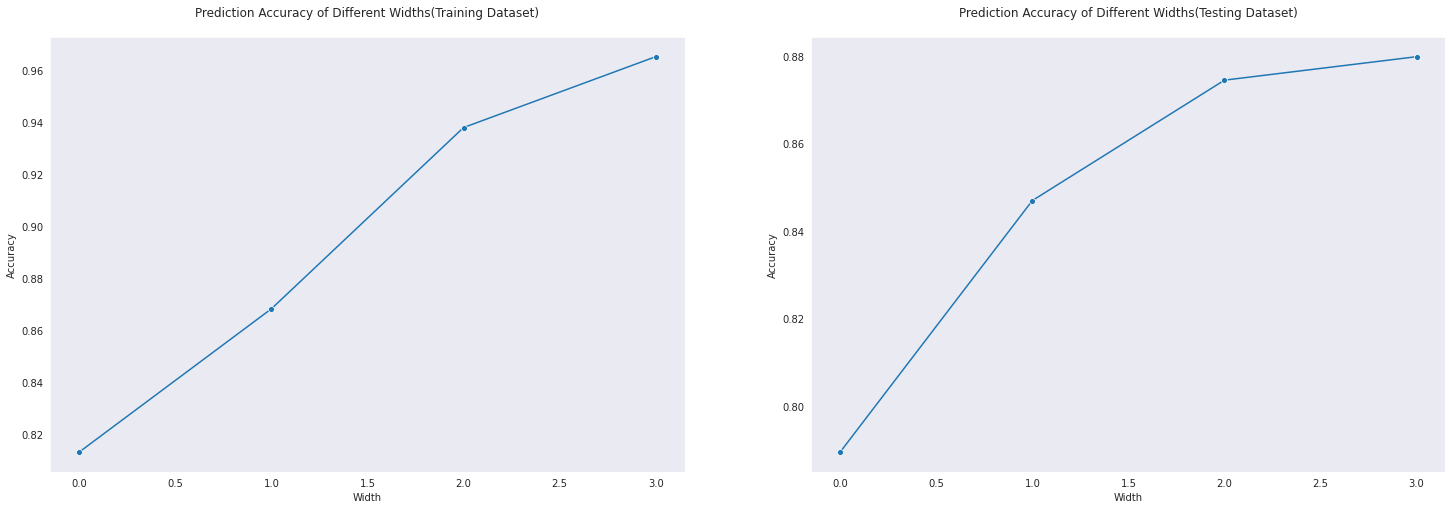

In [54]:
# Visualisation.
fig = plt.figure(figsize=(25, 8))
gs = fig.add_gridspec(1, 2)

# Training dataset figure.
ax = fig.add_subplot(gs[0, 0])
sns.lineplot(data=a_train, marker="o")
ax.set_title('Prediction Accuracy of Different Widths(Training Dataset)', pad = 20)
ax.set_xlabel('Width')
ax.set_ylabel('Accuracy')

# Testing dataset figure.
ax = fig.add_subplot(gs[0, 1])
sns.lineplot(data=a_test, marker="o")
ax.set_title('Prediction Accuracy of Different Widths(Testing Dataset)', pad = 20)
ax.set_xlabel('Width')
ax.set_ylabel('Accuracy')

#### Questions

What can you infer from the graph? (answer in the text box here).

Think about the following:
* Do I have a deeper network that has fewer neurons but is doing better than my very wide network?
* How many weights did I need to train?


The overall accuracy of the testing dataset increased by 1.07%(from 86.92% to 87.99%) with three layers of network, while each have a width of 100, 100, and 50 respectively. Thus, a deeper network with fewer neurons does perform better than a very wide network.

The optimal solution takes 3 layers(width: 100, 100, 50). The number of weights can be calculated by (784x100) + (100x100) + (100x50) + (50x10) = 93900.

## Task 4: Confusion matrix

A [confusion matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix) is a powerful way to visualise errors in your trained network. Plot a confusion matrix for your best model above (of course, plot using the test data).

Describe what you see in the confusion matrix.

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


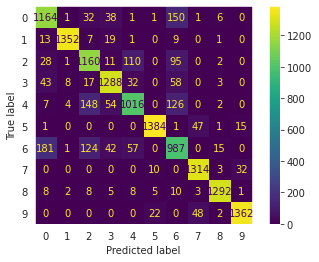

In [56]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(mlpClf2, X_test, y_test)  
plt.show()

From the confusion matrix, we can see that majority of the labels are correctly predicted. The label with the lowest accuracy is Label 6(shirt) while the label with the highest accuracy is Label 9(ankle boot).

The label with the most incorrect predictions is T-shirt and top predicted as shirt. This makes a lot of sense because they all look very similar.

Overall, the predictions are pretty accurate.